In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **UMAP**

This is a technique used for dimensionality reduction.

**How it works?**

- UMAP first contructs a graph where each data point is connected to its nearest neighbors, this graph represents high-dimensional structure of data
- UMAP optimizes this graph in a lower-dimensional space, and tries to maintain the relationships between points as much as possible
- The result is a 2D representation of data that preserves the structure from high-dimensional spaces

In this project, UMAP helps in reducing high-dimensional feature vectors generated using DenseNet121 to 2D so that they can be visualized easily.


**Why use it?**

UMAP can help identify patterns and clusters within the data, which is crucial for understanding how the model distinguishes between different types of skin lesions


In [6]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step


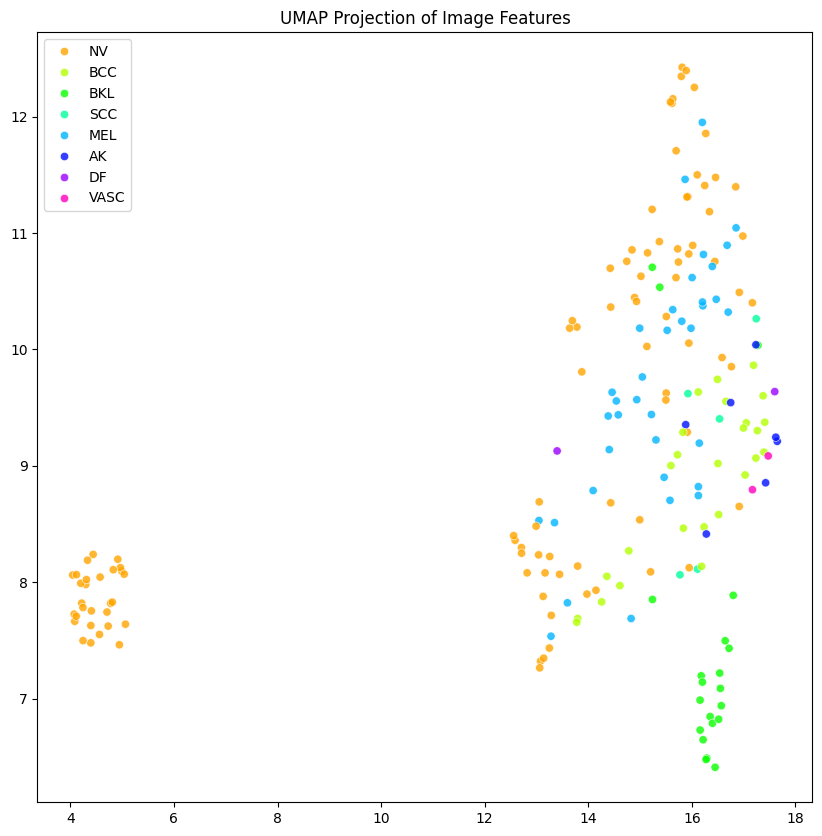

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import umap
import seaborn as sns
import pandas as pd
import os

# Load the trained DenseNet121 model
model = load_model('/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/trained_models/DenseNet121_trained_model_50_epochs.keras')

# Modify the model to extract features from the GlobalAveragePooling2D layer
feature_model = Model(inputs=model.input, outputs=model.get_layer('global_average_pooling2d').output)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Load and preprocess test images
test_image_folder = '/content/drive/MyDrive/PHD_MMU/Skin_Lesion_Classification/train_val_test_split/split_images/test/'
test_df = pd.read_csv(os.path.join(test_image_folder, 'test.csv'))
test_df['image'] = test_df['image'].apply(lambda x: x if x.endswith('.jpg') else x + '.jpg')

test_images = []
labels = []

for image_name, label in zip(test_df['image'], test_df['combined_class']):
    image_path = os.path.join(test_image_folder, image_name)
    img = preprocess_image(image_path)
    test_images.append(img)
    labels.append(label)

test_images = np.vstack(test_images)

# Extract features using the modified model
features = feature_model.predict(test_images)

# Apply UMAP to reduce the dimensionality to 2D
reducer = umap.UMAP(n_components=2)
reduced_features = reducer.fit_transform(features)

# Plot the reduced features
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=labels,
    palette=sns.color_palette("hsv", len(np.unique(labels))),
    legend='full',
    alpha=0.8
)
plt.title('UMAP Projection of Image Features')
plt.show()
